In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import the Canadian Geochronology Knowledgebase

The CGKB compilation represents publicly available geochronological information for  Canada. The data is compiled from federal, provincial and territorial government publications and reports, university theses, books and journal articles.

https://www.nrcan.gc.ca/maps-tools-publications/tools/geodetic-reference-systems/canadian-geochronology-knowledgebase/18211

In [17]:
GSC_data = pd.read_csv('data/GSC_compilation/Geochron_en.txt',sep='\t')
GSC_data.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
0,16505,2808,Missi 5,1881.0,8.0,8.0,Pb-evap,Detrital,"Fraction 3, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:51


In [18]:
GSC_data_meta = GSC_data[(GSC_data.Age_Interpretation == 'Peak Metamorphic') | (GSC_data.Age_Interpretation == 'Metamorphic')]
GSC_data_ign = GSC_data[(GSC_data.Age_Interpretation == 'Igneous Crystallization')]
GSC_data_meta_Grenville = GSC_data_meta[GSC_data_meta.Geological_Province == 'Grenville Province']
GSC_data_meta_Grenville.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
2021,14627,-9328,CG97-301,975.5,5.1,5.1,U/Pb,Metamorphic,Only one titanite analysis,Titanite,...,Grenville Province,NL,51.04865,-56.76933,"Tectonic inlier, N of northern end of Long Ran...",Grenville Inlier withe the Paleozoic platform ...,Plutonic,"Pink- to grey- weathering, medium-grained, rec...","Heaman, L.M., Gower, C.F. and Perrault, S., 20...",2004-01-01 12:00:00


In [19]:
GSC_data_meta_Grenville = GSC_data_meta_Grenville.sort_values('Age')
GSC_data_meta_Grenville = GSC_data_meta_Grenville.sort_values('References')

In [20]:
GSC_data_meta_Grenville.to_csv('Data/GSC_data_meta_Grenville.csv')

In [21]:
Grenville_monazite = GSC_data_meta[(GSC_data_meta.Geological_Province == 'Grenville Province') & 
                                   (GSC_data_meta.Age_Material == 'Monazite') &  
                                    (GSC_data_meta.Error_Plus != 0) &  
                                    (GSC_data_meta.Error_Plus < 20)]

Grenville_monazite = Grenville_monazite[Grenville_monazite.Age_Note != 'Grey-literature: information and age quality to be verified by user']
Grenville_monazite = Grenville_monazite.sort_values('Age')
Grenville_monazite.reset_index(inplace=True)
Grenville_monazite.to_csv('data/GSC_compilation/GSC_data_meta_Grenville_monazite.csv')

## Calculate weighted means from published data

In [22]:
def weighted_mean(dates,sigma):
    
    """
    calculated a weighted mean from dates and uncertainities
    
    input parameters
    ----------------
    dates: date of individual grains
    sigma: 1 sigma uncertainty associated with dates
    
    returns
    ----------------
    weighted_mean, 2 sigma uncertainty
    
    """
    
    inverse_variance=[]
    alpha=[]
    weighted_mean_calc=[]
    
    for n in range(0,len(dates)):
        value = 1/sigma[n]**2
        inverse_variance.append(value)
    inverse_variance_sum = np.sum(inverse_variance)
    
    for n in range(0,len(dates)):
        value = (1/sigma[n]**2)/inverse_variance_sum
        alpha.append(value)
        
    #calculate the weights for each date
    for n in range(0,len(dates)):
        value = alpha[n]*dates[n]
        weighted_mean_calc.append(value)
    
    #take the sum of the weights multiplied by the dates to get the weighted
    #mean (equation 64 of McLean et al., 2011)
    weighted_mean = np.sum(weighted_mean_calc)
    
    #the variance of the weighted mean is simply the inverse of the sum of
    #the inverse variances of each date (equation 66 of McLean et al., 2011)
    variance = 1/inverse_variance_sum
    
    weighted_mean_sigma = np.sqrt(variance)
    
    n = len(dates)
    
    print('The weighted mean is:')

    print(weighted_mean)

    print('With a 2sigma error of:')

    print(2*weighted_mean_sigma)
    
    print('N=' )
    print(n)
    
    return weighted_mean, 2*weighted_mean_sigma

Data from **Constraints on the timing and duration of orogenic events by combined Lu–Hf and Sm–Nd geochronology: An example from the Grenville orogeny**

Errors are 1$\sigma$

In [23]:
J2018_z = pd.read_csv('data/Johnson2018/Johnson2018_zircon.csv')
J2018_z_rim = J2018_z[J2018_z.rim_core=='rim']
J2018_z_rim_BV10 = J2018_z_rim[J2018_z_rim['sample_ID']=='BV10']
J2018_z_rim_S09 = J2018_z_rim[J2018_z_rim['sample_ID']=='S09']
J2018_z_rim_S10 = J2018_z_rim[J2018_z_rim['sample_ID']=='S10']
J2018_z_rim_ST10 = J2018_z_rim[J2018_z_rim['sample_ID']=='ST10']

In [24]:
J2018_z_rim_BV10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
101,BV10,1.2*,NaN,0.000030,0.0723,0.052,660,0.15,1004,11,982,9,1.669,1.3,0.1685,1.2,0.942,rim
104,BV10,4.1*,NaN,0.000042,0.0727,0.072,350,0.70,1038,40,989,36,1.737,4.6,0.1747,4.2,0.920,rim
105,BV10,5.1*,NaN,0.000024,0.0723,0.042,550,0.27,1010,21,985,29,1.683,2.6,0.1697,2.2,0.837,rim
109,BV10,9.1*,NaN,0.000029,0.0728,0.050,600,0.22,1043,49,996,73,1.752,6.2,0.1756,5.1,0.815,rim
110,BV10,10.1*,NaN,-0.000024,0.0728,-0.042,510,0.49,1003,12,1018,42,1.699,2.4,0.1684,1.2,0.513,rim
113,BV10,12.2*,NaN,0.000090,0.0738,0.150,790,0.15,954,11,1000,16,1.595,1.4,0.1595,1.2,0.828,rim
117,BV10,16.1*,NaN,-0.000019,0.0718,-0.032,490,1.25,1010,19,987,9,1.684,2.1,0.1696,2.0,0.975,rim
129,BV10,27.2*,NaN,0.000024,0.0730,0.041,520,0.08,974,17,1006,18,1.636,2.1,0.1632,1.9,0.907,rim


In [25]:
weighted_mean(J2018_z_rim_BV10['207Pb_206Pb_date'].tolist(),J2018_z_rim_BV10['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
988.9222078346816
With a 2sigma error of:
10.783396557500131
N=
8


(988.9222078346816, 10.783396557500131)

In [26]:
J2018_z_rim_S09

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
1,S09,1,2.1*,0.000028,0.0743,0.048,350,0.98,1011,22,1038,29,1.730,2.7,0.1699,2.3,0.853,rim
4,S09,1,4.2*,0.000020,0.0735,0.035,2800,0.02,1086,20,1019,27,1.852,2.4,0.1836,2.0,0.825,rim
5,S09,1,4.3*,0.000010,0.0712,0.018,6200,0.03,843,16,958,10,1.368,2.1,0.1398,2.0,0.969,rim
6,S09,1,5.1*,0.000095,0.0759,0.160,240,1.10,1022,22,1055,34,1.764,2.9,0.1717,2.3,0.805,rim
8,S09,1,6.2*,0.000010,0.0730,0.017,2700,0.02,1015,19,1011,22,1.714,2.3,0.1705,2.0,0.878,rim
9,S09,1,7.1*,-0.000008,0.0742,-0.013,300,0.71,1020,21,1049,30,1.755,2.7,0.1714,2.2,0.838,rim
10,S09,1,7.2*,0.000044,0.0719,0.075,380,0.67,1027,20,964,47,1.697,3.1,0.1728,2.1,0.675,rim
12,S09,1,8.2*,0.000002,0.0742,0.004,4300,0.02,954,19,1046,11,1.630,2.2,0.1594,2.1,0.968,rim
19,S09,1,14.2*,0.000000,0.0721,0.000,580,0.32,997,19,987,22,1.662,2.3,0.1673,2.1,0.889,rim
25,S09,1,19.2*,0.000029,0.0739,0.049,470,0.52,1025,20,1027,24,1.745,2.4,0.1723,2.1,0.867,rim


In [27]:
weighted_mean(J2018_z_rim_S09['207Pb_206Pb_date'].tolist(),J2018_z_rim_S09['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
1005.4899472496404
With a 2sigma error of:
11.719684826117621
N=
10


(1005.4899472496404, 11.719684826117621)

In [28]:
J2018_z_rim_S10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
29,S10,1,1.3*,0.001323,0.0874,2.300,450,0.45,1053,17,881,120,1.673,6.3,0.1774,1.7,0.277,rim
32,S10,1,3.2*,0.000235,0.0787,0.400,730,0.24,1021,19,1078,30,1.782,2.5,0.1715,2.1,0.808,rim
36,S10,1,6.2*,0.000210,0.0755,0.360,420,0.47,1030,18,1000,57,1.731,3.4,0.1732,1.9,0.569,rim
38,S10,1,7.2*,0.000256,0.0757,0.440,340,0.26,1014,18,987,50,1.693,3.1,0.1704,1.9,0.621,rim
42,S10,1,10.2*,0.000305,0.0757,0.520,1100,0.15,1035,16,967,65,1.713,3.6,0.1742,1.7,0.466,rim
44,S10,1,11.2*,0.000021,0.0744,0.036,1700,0.13,1041,20,1045,31,1.791,2.6,0.1752,2.0,0.795,rim
46,S10,1,12.2*,0.000119,0.0738,0.200,1200,0.15,1035,32,988,53,1.730,4.2,0.1741,3.3,0.788,rim
48,S10,1,14.1*,0.000047,0.0705,0.081,550,0.48,1079,18,924,71,1.755,3.9,0.1823,1.8,0.467,rim
57,S10,1,22.2*,0.000092,0.0736,0.160,400,0.65,1037,18,994,27,1.740,2.3,0.1746,1.9,0.817,rim
58,S10,1,24.1*,0.006197,0.1634,10.500,500,0.30,986,21,1075,290,1.714,14.7,0.1652,2.3,0.154,rim


In [29]:
weighted_mean(J2018_z_rim_S10['207Pb_206Pb_date'].tolist(),J2018_z_rim_S10['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
1010.6135903334875
With a 2sigma error of:
24.876771475282762
N=
13


(1010.6135903334875, 24.876771475282762)

In [30]:
J2018_z_rim_ST10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
68,ST10,1,2.1*,0.000223,0.0751,0.41,200,0.73,1011,45,983,44,1.684,5.2,0.1699,4.8,0.911,rim
70,ST10,1,3.2*,0.000010,0.0764,0.02,2400,0.01,1153,29,1101,8,2.058,2.8,0.1958,2.8,0.990,rim
82,ST10,1,14.2*,0.000044,0.0779,0.08,1200,0.03,1106,21,1129,10,1.994,2.2,0.1871,2.1,0.971,rim
87,ST10,1,19.1*,0.000215,0.0769,0.39,360,0.57,1043,41,1037,44,1.788,4.8,0.1757,4.2,0.891,rim
90,ST10,1,22.1*,0.000287,0.0780,0.53,270,0.71,1052,39,1040,66,1.808,5.2,0.1773,4.0,0.776,rim
93,ST10,1,25.1*,0.000466,0.0780,0.85,260,0.64,1035,35,966,51,1.713,4.4,0.1742,3.6,0.826,rim
97,ST10,1,28.2*,0.000360,0.0755,0.66,460,0.54,1096,46,938,33,1.797,4.8,0.1854,4.6,0.942,rim


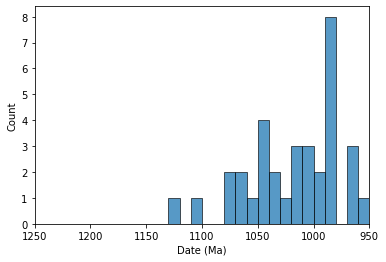

In [31]:
sns.histplot(J2018_z_rim['207Pb_206Pb_date'],bins=np.arange(800,1300,10))
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [98]:
file_150 = 'data/Williams2019/16TG150-Elephant-Rock-Monazite-Composition-reformat.xlsx'
file_151 = 'data/Williams2019/16Tg151-Treadway-Mountain-Monzite-Composition-Reformat.xlsx'
file_153 = 'data/Williams2019/16TG153-Dixon-schist-Monazite Composition-reformat.xlsx'
file_154 = 'data/Williams2019/16TG154-Swede-Pond-Monazite-Composition-reformat.xlsx'

M2019_150 = pd.read_excel(file_150,header=2,nrows=24)
M2019_151 = pd.read_excel(file_151,header=2,nrows=37)
M2019_153 = pd.read_excel(file_153,header=2,nrows=14)
M2019_154 = pd.read_excel(file_154,header=3,nrows=37)

M2019_dates = M2019_150.Date.tolist() + M2019_151.Date.tolist() + M2019_153.Date.tolist() + M2019_154.Date.tolist()

(1250.0, 950.0)

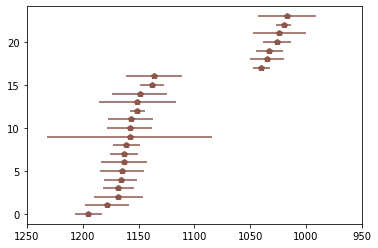

In [99]:
M2019_150 = M2019_150.sort_values('Date',ascending=False)
M2019_150.reset_index(inplace=True)

plt.errorbar(M2019_150.Date,
             M2019_150.index,
             xerr=M2019_150.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

In [101]:
M2019_150_Shawinigan = M2019_150[(M2019_150.Date > 1100)]
M2019_150_Shawinigan = M2019_150_Shawinigan.sort_values('Date',ascending=False)
M2019_150_Shawinigan.reset_index(inplace=True)
weighted_mean(M2019_150_Shawinigan['Date'].tolist(),M2019_150_Shawinigan['Error'].tolist())

The weighted mean is:
1159.5466449546689
With a 2sigma error of:
7.162591303935475
N=
17


(1159.5466449546689, 7.162591303935475)

In [102]:
M2019_150_Grenvillian = M2019_150[(M2019_150.Date < 1100)]
M2019_150_Grenvillian = M2019_150_Grenvillian.sort_values('Date',ascending=False)
M2019_150_Grenvillian.reset_index(inplace=True)
weighted_mean(M2019_150_Grenvillian['Date'].tolist(),M2019_150_Grenvillian['Error'].tolist())

The weighted mean is:
1029.214136218873
With a 2sigma error of:
8.118884888354
N=
7


(1029.214136218873, 8.118884888354)

(1250.0, 950.0)

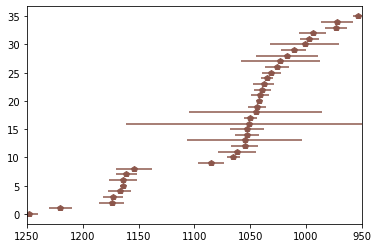

In [93]:
M2019_151 = M2019_151.dropna()
M2019_151 = M2019_151.sort_values('Date',ascending=False)
M2019_151.reset_index(inplace=True)

plt.errorbar(M2019_151.Date,
             M2019_151.index,
             xerr=M2019_151.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

In [94]:
M2019_151_Shawinigan = M2019_151[(M2019_151.Date > 1100) & (M2019_151.Date < 1200)]
M2019_151_Shawinigan = M2019_151_Shawinigan.sort_values('Date',ascending=False)
M2019_151_Shawinigan.reset_index(inplace=True)
weighted_mean(M2019_151_Shawinigan['Date'].tolist(),M2019_151_Shawinigan['Error'].tolist())

The weighted mean is:
1164.927285133439
With a 2sigma error of:
4.9704773408025
N=
7


(1164.927285133439, 4.9704773408025)

In [95]:
M2019_151_Grenvillian = M2019_151[(M2019_151.Date < 1100) & (M2019_151.Date > 1010)] #grains younger than 1010 are considered to be distinct population in paper
M2019_151_Grenvillian = M2019_151_Grenvillian.sort_values('Date',ascending=False)
M2019_151_Grenvillian.reset_index(inplace=True)
weighted_mean(M2019_151_Grenvillian['Date'].tolist(),M2019_151_Grenvillian['Error'].tolist())

The weighted mean is:
1043.7060126278898
With a 2sigma error of:
3.0647088962695515
N=
21


(1043.7060126278898, 3.0647088962695515)

## M2019_154

(1250.0, 950.0)

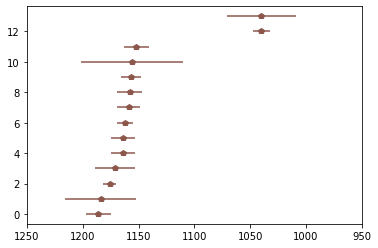

In [60]:
M2019_153 = M2019_153.sort_values('Date',ascending=False)
M2019_153.reset_index(inplace=True)

plt.errorbar(M2019_153.Date,
             M2019_153.index,
             xerr=M2019_153.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

In [64]:
M2019_153_Shawinigan = M2019_153[M2019_153.Date > 1100]
M2019_153_Shawinigan = M2019_153_Shawinigan.sort_values('Date',ascending=False)
M2019_153_Shawinigan.reset_index(inplace=True)

In [65]:
weighted_mean(M2019_153_Shawinigan['Date'].tolist(),M2019_153_Shawinigan['Error'].tolist())

The weighted mean is:
1166.049545760476
With a 2sigma error of:
5.940368110587469
N=
12


(1166.049545760476, 5.940368110587469)

## M2019_154

(1250.0, 950.0)

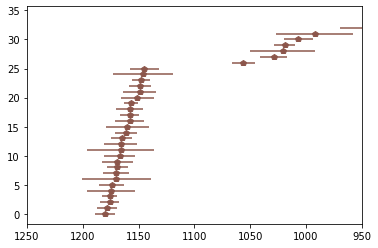

In [59]:
M2019_154 = M2019_154.sort_values('Date',ascending=False)
M2019_154.reset_index(inplace=True)

plt.errorbar(M2019_154.Date,
             M2019_154.index,
             xerr=M2019_154.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

(1250.0, 950.0)

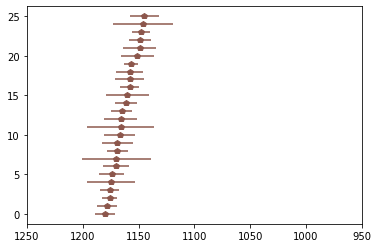

In [57]:
M2019_154_Shawinigan = M2019_154[M2019_154.Date > 1100]
M2019_154_Shawinigan = M2019_154_Shawinigan.sort_values('Date',ascending=False)
M2019_154_Shawinigan.reset_index(inplace=True)

plt.errorbar(M2019_154_Shawinigan.Date,
             M2019_154_Shawinigan.index,
             xerr=M2019_154_Shawinigan.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

In [50]:
weighted_mean(M2019_154_Shawinigan['Date'].tolist(),M2019_154_Shawinigan['Error'].tolist())

The weighted mean is:
1164.1622134414426
With a 2sigma error of:
4.227560249235333
N=
26


(1164.1622134414426, 4.227560249235333)

(1250.0, 950.0)

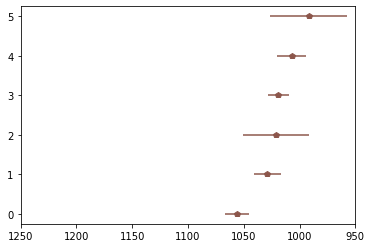

In [56]:
M2019_154_Grenvillian = M2019_154[(M2019_154.Date < 1100) & (M2019_154.Date > 950)] # these are the outer cores
M2019_154_Grenvillian = M2019_154_Grenvillian.sort_values('Date',ascending=False)
M2019_154_Grenvillian.reset_index(inplace=True)

plt.errorbar(M2019_154_Grenvillian.Date,
             M2019_154_Grenvillian.index,
             xerr=M2019_154_Grenvillian.Error,
             fmt='p',color='C5',label='monazite')

plt.xlim(1250,950)

In [55]:
weighted_mean(M2019_154_Grenvillian['Date'].tolist(),M2019_154_Grenvillian['Error'].tolist())

The weighted mean is:
1027.759841014217
With a 2sigma error of:
10.714150806578692
N=
6


(1027.759841014217, 10.714150806578692)

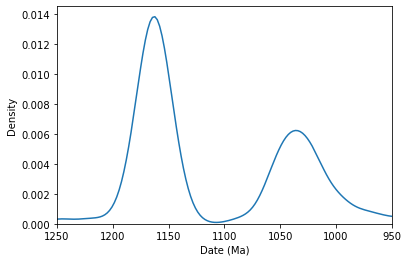

In [35]:
sns.kdeplot(M2019_dates,bw_adjust=0.4)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()